# Homework 0 (100 points)

The goal of this homework is to practice programming in python.

## Exercise 1 (50 points)

In this exercise, you will write code to define and evaluate polynomial expressions. You should write out polynomials yourself to test various use cases / edge cases.

a) Using the code below as an example, write classes for:

- division (called `Div`)
- subtraction (called `Sub`)

you may modify the `Mul` class if needed. Ensure that the rules of parentheses are properly encoded in your `repr` functions. **-10pts**

In [110]:
class X:
    def __init__(self):
        pass

    def __repr__(self):
        return "X"


class Int:
    def __init__(self, i):
        self.i = i

    def __repr__(self):
        return str(self.i)


class Add:
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2

    def __repr__(self):
        return repr(self.p1) + " + " + repr(self.p2)


class Mul:
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2

    def __repr__(self):
        if isinstance(self.p1, Add) or isinstance(self.p1, Sub):
            if isinstance(self.p2, Add) or isinstance(self.p2, Sub):
                return "( " + repr(self.p1) + " ) * ( " + repr(self.p2) + " )"
            return "( " + repr(self.p1) + " ) * " + repr(self.p2)
        if isinstance(self.p2, Add) or isinstance(self.p2, Sub):
            return repr(self.p1) + " * ( " + repr(self.p2) + " )"

        return repr(self.p1) + " * " + repr(self.p2)

class Div:

    def __init__(self, p1, p2) -> None:
        self.p1 = p1
        self.p2 = p2

    def __repr__(self) -> str:
        if isinstance(self.p1, Add) or isinstance(self.p1, Sub):
            if isinstance(self.p2, Add) or isinstance(self.p2, Sub):
                return "( " + repr(self.p1) + " ) / ( " + repr(self.p2) + " )"
            return "( " + repr(self.p1) + " ) / " + repr(self.p2)
        if isinstance(self.p2, Add) or isinstance(self.p2, Sub):
            return repr(self.p1) + " / ( " + repr(self.p2) + " )"
        return repr(self.p1) + " / " + repr(self.p2)


class Sub:
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2

    def __repr__(self):
        return repr(self.p1) + " - " + repr(self.p2)


poly = Add( Add( Int(4), Int(3)), Add( X(), Mul( Int(1), Add( Mul(X(), X()), Int(1)))))
print(poly)

4 + 3 + X + 1 * ( X * X + 1 )


b) Write a `simplify` method to each class that can simplify the polynomial. Simplification must respect the folowing rules:

- Adding 0 to (or subtracting 0 from) any polynomial should return that polynomial
- Multiplying (or dividing) any polynomial by 1 should return that polynomial
- Multiplying any polynomial by 0 should return 0
- Adding / Multiplying / Dividing / Subtracting integers together should return a single integer

as an example, here are a few `simplify` methods implemented. **-10pts**

In [111]:
class X:
    def __init__(self):
        pass

    def __repr__(self):
        return "X"

    def simplify(self):
        return self


class Int:
    def __init__(self, i):
        self.i = i

    def __repr__(self):
        return str(self.i)

    def simplify(self):
        return self


class Add:
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2

    def __repr__(self):
        return repr(self.p1) + " + " + repr(self.p2)

    def simplify(self):
        simp1 = self.p1.simplify()
        simp2 = self.p2.simplify()
        if isinstance(simp1, Int):
            if simp1.i == 0:
                return simp2
            if isinstance(simp2, Int):
                return Int(simp1.i + simp2.i)
        if isinstance(simp2, Int):
            if simp2.i == 0:
                return simp1
        return Add(simp1, simp2)

class Sub:
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2

    def __repr__(self):
        return repr(self.p1) + " - " + repr(self.p2)

    def simplify(self):
        simp1 = self.p1.simplify()
        simp2 = self.p2.simplify()
        if isinstance(simp1, Int):
            if simp1.i == 0:
                return Int(-simp2.i)
            if isinstance(simp2, Int):
                return Int(simp1.i - simp2.i)
        if isinstance(simp2, Int):
            if simp2.i == 0:
                return simp1
        return Sub(simp1, simp2)

class Mul:
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2

    def __repr__(self):
        if isinstance(self.p1, Add) or isinstance(self.p1, Sub):
            if isinstance(self.p2, Add) or isinstance(self.p2, Sub):
                return "( " + repr(self.p1) + " ) * ( " + repr(self.p2) + " )"
            return "( " + repr(self.p1) + " ) * " + repr(self.p2)
        if isinstance(self.p2, Add) or isinstance(self.p2, Sub):
            return repr(self.p1) + " * ( " + repr(self.p2) + " )"

        return repr(self.p1) + " * " + repr(self.p2)


    def simplify(self):
        simp1 = self.p1.simplify()
        simp2 = self.p2.simplify()
        if isinstance(simp1, Int):
            if simp1.i == 0:
                return Int(0)
            if simp1.i == 1:
                return simp2
            if isinstance(simp2, Int):
                return Int(simp1.i * simp2.i)

        if isinstance(simp2, Int):
            if simp2.i == 0:
                return Int(0)
            if simp2.i == 1:
                return simp1
        return Mul(simp1, simp2)


class Div:

    def __init__(self, p1, p2) -> None:
        self.p1 = p1
        self.p2 = p2

    def __repr__(self) -> str:
        if isinstance(self.p1, Add) or isinstance(self.p1, Sub):
            if isinstance(self.p2, Add) or isinstance(self.p2, Sub):
                return "( " + repr(self.p1) + " ) / ( " + repr(self.p2) + " )"
            return "( " + repr(self.p1) + " ) / " + repr(self.p2)
        if isinstance(self.p2, Add) or isinstance(self.p2, Sub):
            return repr(self.p1) + " / ( " + repr(self.p2) + " )"
        return repr(self.p1) + " / " + repr(self.p2)

    def simplify(self):
        simp1 = self.p1.simplify()
        simp2 = self.p2.simplify()
        if isinstance(simp1, Int):
            if simp1.i == 0:
                return Int(0)
            if simp1.i == 1:
                return simp2
            if isinstance(simp2, Int):
                return Int(simp1.i / simp2.i)
        if isinstance(simp2, Int):
            if simp2.i == 0:
                raise Exception("Divided 0 error!")
            if simp2.i == 1:
                return simp1
        return Div(simp1, simp2)



poly = Add( Add( Int(4), Int(3)), Add( X(), Mul( Int(1), Add( Mul(X(), X()), Int(1)))))
print(poly)
print(poly.simplify())

4 + 3 + X + 1 * ( X * X + 1 )
7 + X + X * X + 1


c) Write an `evaluate` method to each class that can evaluate the polynomial for a given value of `X`. **-10pts**

In [112]:
class X:
    def __init__(self):
        pass

    def __repr__(self):
        return "X"

    def simplify(self):
        return self

    def evaluate(self, i):
        return Int(i)


class Int:
    def __init__(self, i):
        self.i = i

    def __repr__(self):
        return str(self.i)

    def simplify(self):
        return self

    def evaluate(self, i):
        return self


class Add:
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2

    def __repr__(self):
        return repr(self.p1) + " + " + repr(self.p2)

    def simplify(self):
        simp1 = self.p1.simplify()
        simp2 = self.p2.simplify()
        if isinstance(simp1, Int):
            if simp1.i == 0:
                return simp2
            if isinstance(simp2, Int):
                return Int(simp1.i + simp2.i)
        if isinstance(simp2, Int):
            if simp2.i == 0:
                return simp1
        return Add(simp1, simp2)

    def evaluate(self, i):
        simp1 = self.p1.simplify()
        simp2 = self.p2.simplify()

        return Add(simp1.evaluate(i), simp2.evaluate(i)).simplify()

class Sub:
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2

    def __repr__(self):
        return repr(self.p1) + " - " + repr(self.p2)

    def simplify(self):
        simp1 = self.p1.simplify()
        simp2 = self.p2.simplify()
        if isinstance(simp1, Int):
            if simp1.i == 0:
                return Int(-simp2.i)
            if isinstance(simp2, Int):
                return Int(simp1.i - simp2.i)
        if isinstance(simp2, Int):
            if simp2.i == 0:
                return simp1
        return Sub(simp1, simp2)

    def evaluate(self, i):
        simp1 = self.p1.simplify()
        simp2 = self.p2.simplify()

        return Sub(simp1.evaluate(i), simp2.evaluate(i)).simplify()

class Mul:
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2

    def __repr__(self):
        if isinstance(self.p1, Add) or isinstance(self.p1, Sub):
            if isinstance(self.p2, Add) or isinstance(self.p2, Sub):
                return "( " + repr(self.p1) + " ) * ( " + repr(self.p2) + " )"
            return "( " + repr(self.p1) + " ) * " + repr(self.p2)
        if isinstance(self.p2, Add) or isinstance(self.p2, Sub):
            return repr(self.p1) + " * ( " + repr(self.p2) + " )"

        return repr(self.p1) + " * " + repr(self.p2)


    def simplify(self):
        simp1 = self.p1.simplify()
        simp2 = self.p2.simplify()
        if isinstance(simp1, Int):
            if simp1.i == 0:
                return Int(0)
            if simp1.i == 1:
                return simp2
            if isinstance(simp2, Int):
                return Int(simp1.i * simp2.i)

        if isinstance(simp2, Int):
            if simp2.i == 0:
                return Int(0)
            if simp2.i == 1:
                return simp1
        return Mul(simp1, simp2)

    def evaluate(self, i):
        simp1 = self.p1.simplify()
        simp2 = self.p2.simplify()

        return Mul(simp1.evaluate(i), simp2.evaluate(i)).simplify()




class Div:

    def __init__(self, p1, p2) -> None:
        self.p1 = p1
        self.p2 = p2

    def __repr__(self) -> str:
        if isinstance(self.p1, Add) or isinstance(self.p1, Sub):
            if isinstance(self.p2, Add) or isinstance(self.p2, Sub):
                return "( " + repr(self.p1) + " ) / ( " + repr(self.p2) + " )"
            return "( " + repr(self.p1) + " ) / " + repr(self.p2)
        if isinstance(self.p2, Add) or isinstance(self.p2, Sub):
            return repr(self.p1) + " / ( " + repr(self.p2) + " )"
        return repr(self.p1) + " / " + repr(self.p2)

    def simplify(self):
        simp1 = self.p1.simplify()
        simp2 = self.p2.simplify()
        if isinstance(simp1, Int):
            if simp1.i == 0:
                return Int(0)
            if simp1.i == 1:
                return simp2
            if isinstance(simp2, Int):
                return Int(simp1.i / simp2.i)
        if isinstance(simp2, Int):
            if simp2.i == 0:
                raise Exception("Divided 0 error!")
            if simp2.i == 1:
                return simp1
        return Div(simp1, simp2)

    def evaluate(self, i):
        simp1 = self.p1.simplify()
        simp2 = self.p2.simplify()
        return Div(simp1.evaluate(i), simp2.evaluate(i)).simplify()


poly = Add( Add( Int(4), Int(3)), Add( X(), Mul( Int(1), Add( Mul(X(), X()), Int(1)))))
print(poly)
print(poly.simplify())
print(poly.evaluate(-1))

4 + 3 + X + 1 * ( X * X + 1 )
7 + X + X * X + 1
8


d) Add a `Pow` class (implementing all the above methods). (Note: multiplying multiple instances of `X` should simplify to a `Pow` of `X`) **-20pts**

In [113]:
class Pow:

    def __init__(self, p1, p2) -> None:
        self.p1 = p1
        self.p2 = p2

    def __repr__(self) -> str:
        if isinstance(self.p1, Add) or isinstance(self.p1, Sub) or \
                isinstance(self.p1, Mul) or isinstance(self.p1, Div):
            if isinstance(self.p2, Add) or isinstance(self.p2, Sub) or \
                    isinstance(self.p2, Mul) or isinstance(self.p2, Div):
                return "( " + repr(self.p1) + " ) ^ ( " + repr(self.p2) + " )"
            return "( " + repr(self.p1) + " ) ^ " + repr(self.p2)
        if isinstance(self.p2, Add) or isinstance(self.p2, Sub) or \
                isinstance(self.p2, Mul) or isinstance(self.p2, Div):
            return repr(self.p1) + " ^ ( " + repr(self.p2) + " )"
        return repr(self.p1) + " ^ " + repr(self.p2)

    def simplify(self):
        simp1 = self.p1.simplify()
        simp2 = self.p2.simplify()
        if isinstance(simp1, Int):
            if simp1.i == 0:
                if isinstance(simp2, Int):
                    return Int(0**simp2.i)
                return Int(0)
            if simp1.i == 1:
                return 1
            if isinstance(simp2, Int):
                return Int(simp1.i ** simp2.i)
        if isinstance(simp2, Int):
            if simp2.i == 0:
                return Int(1)
            if simp2.i == 1:
                return simp1
        return Div(simp1, simp2)

    def evaluate(self, i):
        simp1 = self.p1.simplify()
        simp2 = self.p2.simplify()
        return Pow(simp1.evaluate(i), simp2.evaluate(i)).simplify()



## Exercise 2 (50 Points)

In this exercise we will writing a sudoku solver.

a) Similarly to how we defined polynomials above, define the sudoku board using a
`Board` class comprised of nine rows of nine elements. Write a `repr` method to
print the board neatly to the command line. Print an empty board. **-5pts**

In [114]:
class Board:
    def __init__(self) -> None:
        self.board = []
        self.row = 9
        self.col = 9
        for i in range(self.row):
            self.board.append([0]*self.col)

    def __repr__(self):
        s = ""
        for row in self.board:
            for item in row:
                s += "{:4s}".format(str(item))
            s += "\n"
        return s
b = Board()
print(b)



0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   



b) write getter and setter methods. **-5pts**

`Board` class should have:

- `get_col` to get a specified column of the board.
- `get_row` to get a specified row of the board.
- `set_row` to set a specified row of the board.
- `get_elm` to get an element at a particular row and column.
- `set_elm` to set an element at a particular row and column.
- `get_box` to get the box containing a (row, col) location.

In [115]:
class Board:
    def __init__(self) -> None:
        self.board = []
        self.row = 9
        self.col = 9
        for i in range(self.row):
            self.board.append([0]*self.col)

    def __repr__(self):
        s = ""
        for row in self.board:
            for item in row:
                s += "{:4d}".format(item)
            s += "\n"
        return s

    def get_row(self, row):
        return self.board[row]

    def get_col(self, col):
        items = []
        for i in range(self.row):
            items.append(self.board[i][col])
        return items

    def set_row(self, row, items):
        self.board[row] = items

    def get_ele(self, row, col):
        return self.board[row][col]

    def set_ele(self, row, col, item):
        self.board[row][col] = item

    def get_box(self, row, col):
        start_row = row // 3 * 3
        start_col = col // 3 * 3
        box = []
        for r in range(start_row, start_row+3):
            box.append(self.board[r][start_col:start_col+3])
        return box



c) Using the above code, define and print the following sudoku. **-5pts**

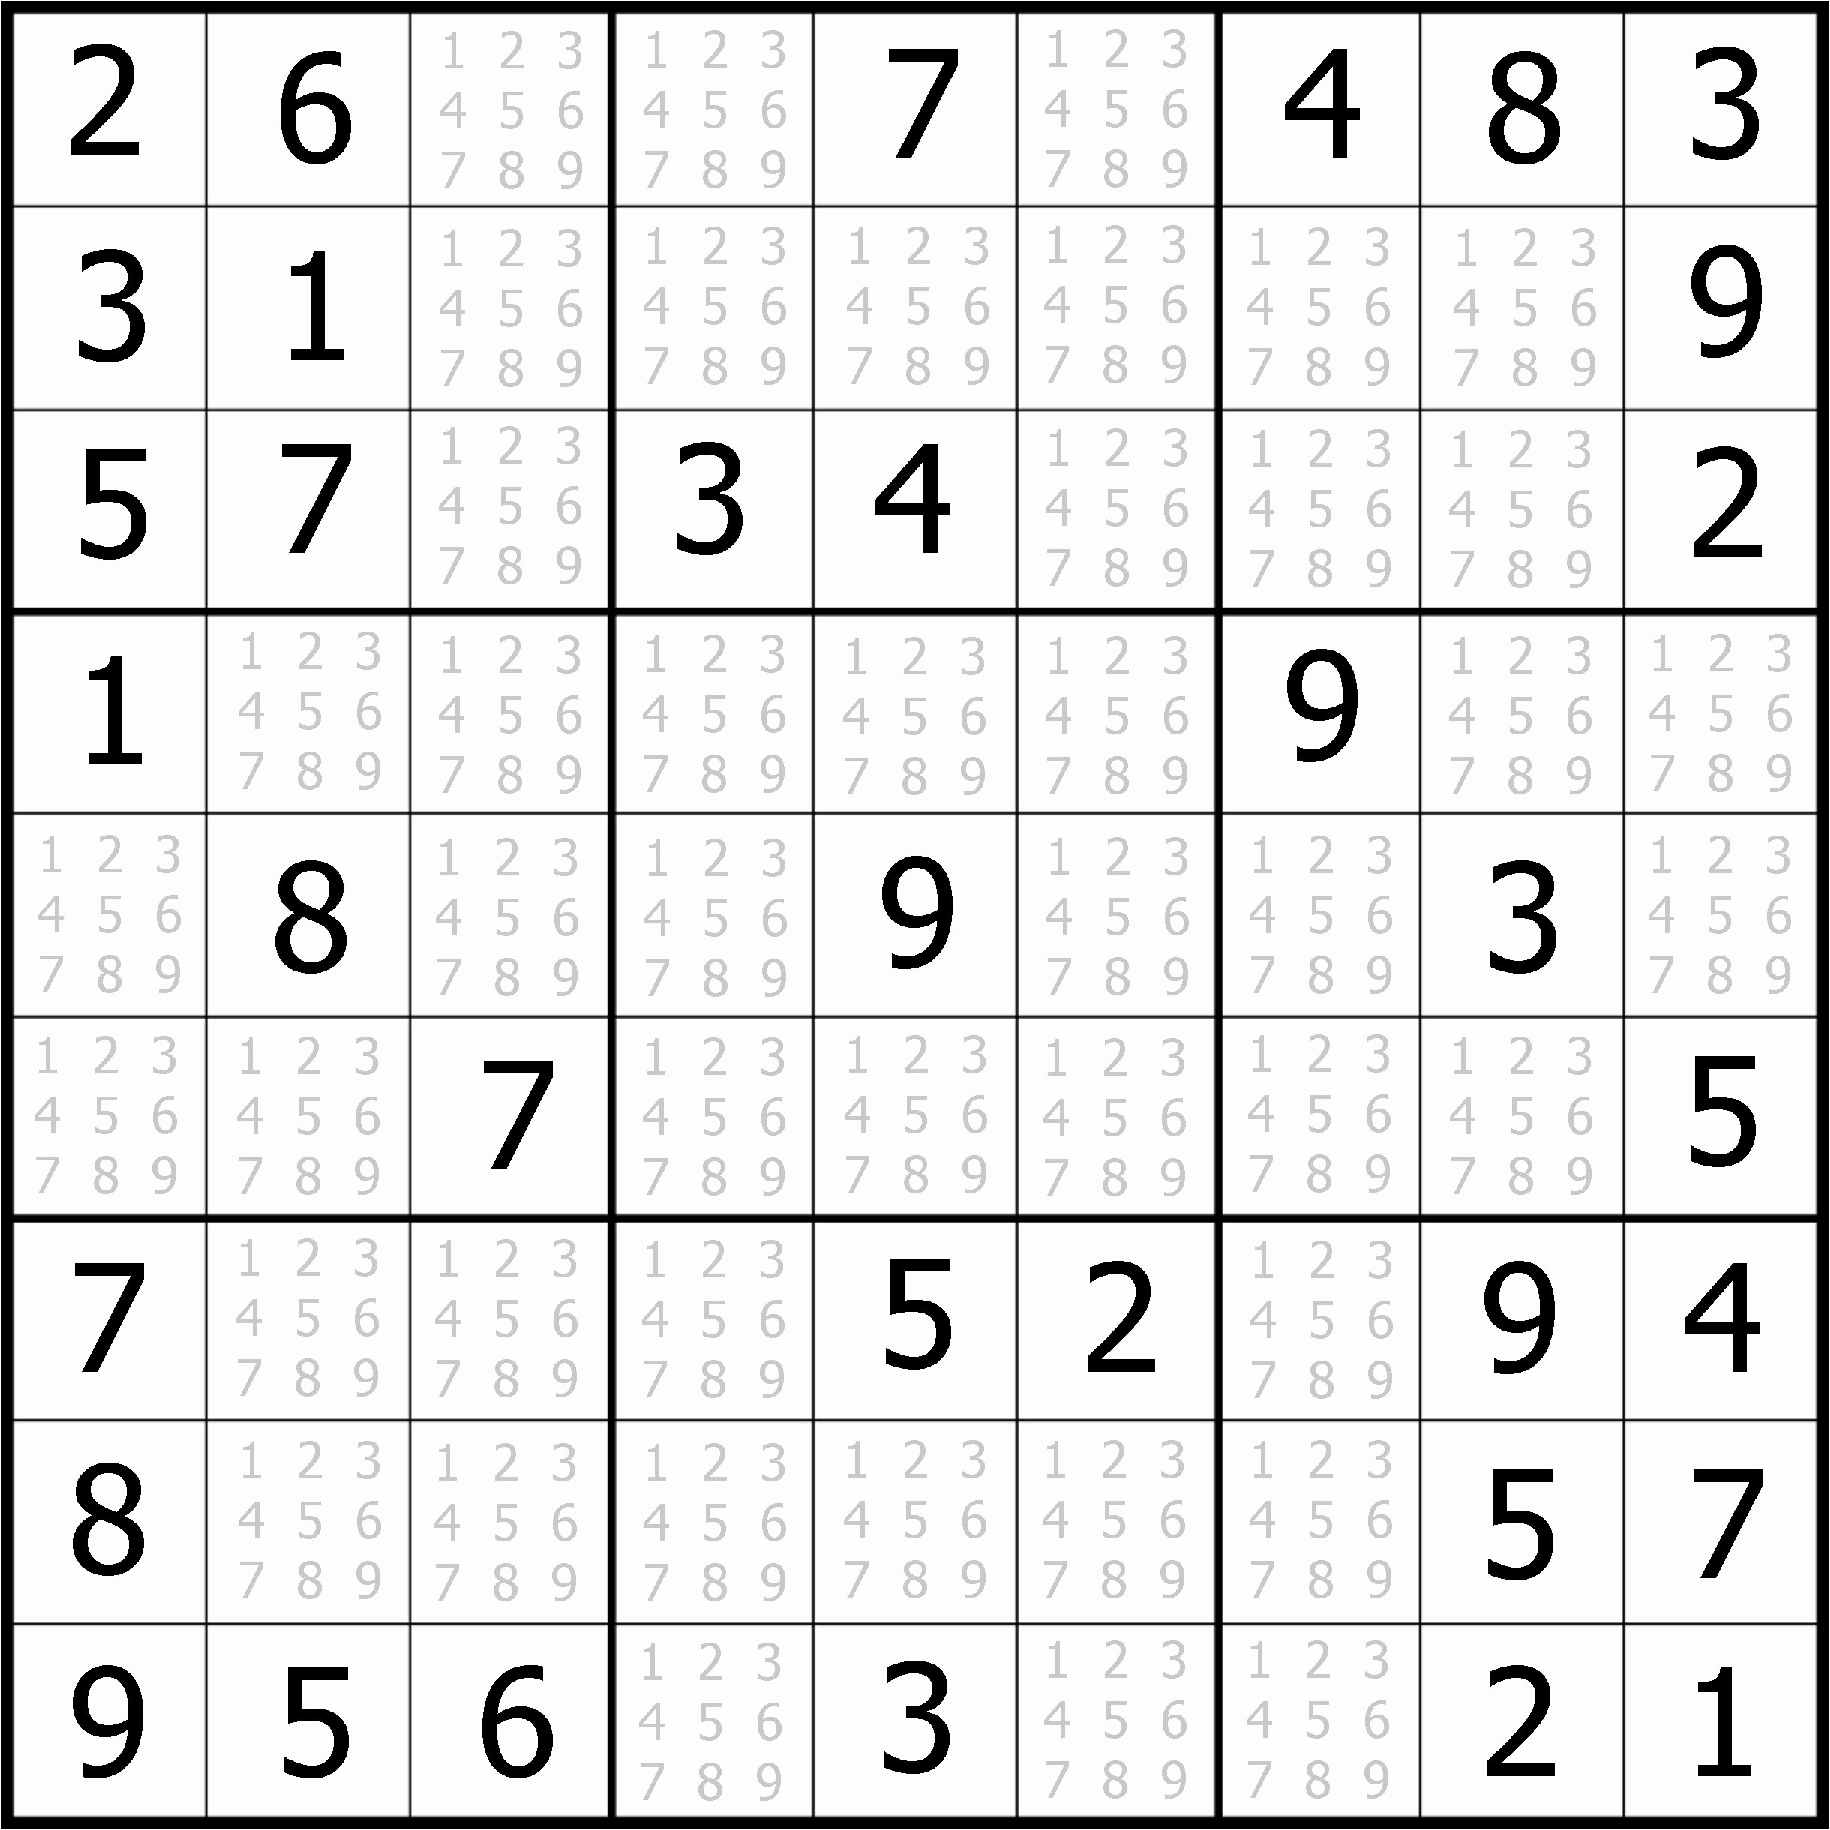

In [116]:
from IPython.display import Image
Image(filename="sudoku.jpg", width=300, height=300)

In [117]:
sudiku = [
    [2, 6, 0,0, 7, 0, 4, 8, 3],
    [3, 1, 0, 0, 0, 0, 0, 0, 9],
    [5, 7, 0, 3, 4,0, 0, 0,  2],
    [1, 0, 0, 0, 0, 0, 9, 0, 0 ],
    [0, 8, 0, 0, 9,0, 0, 3, 0],
    [0, 0, 7,0, 0, 0, 0, 0, 5],
    [7, 0, 0, 0, 5, 2, 0, 9, 4],
    [8, 0, 0, 0, 0, 0, 0, 5, 7],
    [9, 5, 6, 0, 3, 0, 0,  2, 1],
]

b = Board()
for i in range(len(sudiku)):
    b.set_row(i, sudiku[i])
print(b)


   2   6   0   0   7   0   4   8   3
   3   1   0   0   0   0   0   0   9
   5   7   0   3   4   0   0   0   2
   1   0   0   0   0   0   9   0   0
   0   8   0   0   9   0   0   3   0
   0   0   7   0   0   0   0   0   5
   7   0   0   0   5   2   0   9   4
   8   0   0   0   0   0   0   5   7
   9   5   6   0   3   0   0   2   1



d) Create a method to determine whether a given move at a specified location
 on the board is legal. Recall in sudoku there can be no repeating integers
 in the row, column, or box and each element must be an integer between
 1 and 9 inclusive.
 **-10pts**

In [118]:
def check(board:Board, num, loc):
    x = loc[0]
    y = loc[1]

    row = board.get_row(x)
    col = board.get_col(y)
    for n in row:
        if n == num:
            return False
    for n in col:
        if n == num:
            return False
    box = board.get_box(x, y)
    for i in range(3):
        for j in range(3):
            if box[i][j] == num:
                return False
    return True



e) Using depth first search, write a method that searches for solutions and returns the first it finds. Here is the breakdown of the algorithm you should implement:

Start with the first element in the top left. While the next row to explore is not out of bounds:
- if the element is not set, start by trying the integer 1
- if this is a valid move according to the rules of sudoku, then move on to the next unset element in the board
- if this is not a valid move then try the next possible integer in ascending order
- if you've tried all possible integers and none are valid moves, then reset the element and backtrack to the previously element and increment it to the next possible integer. (if that still isn't possible, you should keep backtracking)

If you reach the end of the board and have a valid sudoku, you have solved the puzzle. If you backtrack all the way to the first element and there are no valid integers, then the puzzle is impossible.

Test your code on the sudoku from 2 c).

**-25pts**

In [119]:
def find_next(board:Board, stack:list):
    for i in range(0, 9):
        for j in range(0, 9):
            if board.get_ele(i, j) == 0:
                stack.append((i, j))
                return

def replace(board, x, y):
    for number in range(board.get_ele(x, y) + 1, 10):
        if check(board, number, (x, y)):
            board.set_ele(x, y, number)
            return True
    board.set_ele(x, y, 0)
    return False

def fill(board:Board):
    for i in range(9):
        for j in range(9):
            if board.get_ele(i, j) == 0:
                return False
    return True

def solve(board:Board):
    stack = []
    find_next(board, stack)
    while not fill(board):
        if len(stack) <= 0:
            return None
        x, y = stack[-1]
        if replace(board, x, y):
            find_next(board, stack)
        else:
            stack.pop()
    return board

print(solve(b))

   2   6   9   1   7   5   4   8   3
   3   1   4   6   2   8   5   7   9
   5   7   8   3   4   9   1   6   2
   1   2   3   5   6   7   9   4   8
   4   8   5   2   9   1   7   3   6
   6   9   7   4   8   3   2   1   5
   7   3   1   8   5   2   6   9   4
   8   4   2   9   1   6   3   5   7
   9   5   6   7   3   4   8   2   1



## Bonus (20 points)

You may get points for completing any of the parts but no points will be awarded for partial solutions.

a) Using the code you wrote in exercise 1, write a function to determine whether two polynomials are equal. **-10pts**

In [120]:
def are_equal(p1, p2):
    return p1.evaluate(10) == p2.evaluate(10)

b) Modify your function from ex 2 e) to return all possible 
solutions to a given sudoku. Test this out on the sudoku given in 2 c), then on the following sudoku: **-10pts**

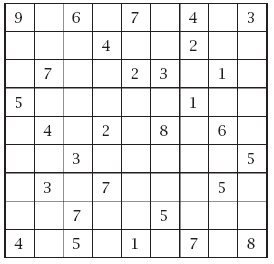

In [121]:
from IPython.display import Image
Image(filename="bonus.jpg")